In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('loan.csv', low_memory=False)

In [3]:
dataset.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade     ...      total_bal_il il_util  \
0     10.65       162.87     B        B2     ...               NaN     NaN   
1     15.27        59.83     C        C4     ...               NaN     NaN   
2     15.96        84.33     C        C5     ...               NaN     NaN   
3     13.49       339.31     C        C1     ...               NaN     NaN   
4     12.69        67.79     B        B5     ...               NaN     NaN   

  open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN          NaN        NaN      NaN              NaN    NaN   
1         NaN          NaN        NaN      NaN              NaN    NaN   
2         NaN          NaN        NaN      NaN              NaN    NaN   
3         NaN          NaN        NaN      NaN              NaN    NaN   
4         NaN          NaN        NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 74 columns]

Next up, we want to get rid of sparsely populated variables, so we remove columns with more that 75% missing values

In [4]:
var_null_pc=dataset.isnull().sum(axis=0).sort_values(ascending=False)/float(len(dataset))
var_null_pc[var_null_pc>0.75]

dti_joint                      0.999426
verification_status_joint      0.999424
annual_inc_joint               0.999424
il_util                        0.979020
mths_since_rcnt_il             0.976549
all_util                       0.975916
max_bal_bc                     0.975916
open_rv_24m                    0.975916
open_rv_12m                    0.975916
total_cu_tl                    0.975916
total_bal_il                   0.975916
open_il_24m                    0.975916
open_il_12m                    0.975916
open_il_6m                     0.975916
open_acc_6m                    0.975916
inq_fi                         0.975916
inq_last_12m                   0.975916
desc                           0.857977
mths_since_last_record         0.845553
mths_since_last_major_derog    0.750160
dtype: float64

We have 20 variables which we can remove from modelling and analysis
We should also remove those observations where all values are NAs or nulls

In [5]:
dataset.drop( var_null_pc[ var_null_pc > 0.75 ].index, axis = 1, inplace = True ) 
dataset.dropna( axis = 0, thresh = 30, inplace = True )

After having a closer look at the data (and studying frequency tables), we can remove the following variables, reasons described:

policy_code is always == 1
id and member_id are all unique, which is a bit misleading. So every record is a unique customer
application_type is 'INDIVIDUAL' for 99.94% of the records
zip_code not needed for this level of analysis,
title can be removed as well.

In [6]:
vars_to_be_removed=['id','member_id','policy_code','zip_code','application_type']

dataset.drop( vars_to_be_removed , axis = 1, inplace = True )

In [7]:
dataset.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0     5000.0       5000.0           4975.0   36 months     10.65       162.87   
1     2500.0       2500.0           2500.0   60 months     15.27        59.83   
2     2400.0       2400.0           2400.0   36 months     15.96        84.33   
3    10000.0      10000.0          10000.0   36 months     13.49       339.31   
4     3000.0       3000.0           3000.0   60 months     12.69        67.79   

  grade sub_grade                 emp_title emp_length       ...         \
0     B        B2                       NaN  10+ years       ...          
1     C        C4                     Ryder   < 1 year       ...          
2     C        C5                       NaN  10+ years       ...          
3     C        C1       AIR RESOURCES BOARD  10+ years       ...          
4     B        B5  University Medical Group     1 year       ...          

  collection_recovery_fee  last_pymnt_d last_pymnt_amnt next_pymnt_d  \
0                    0.00      Jan-2015          171.62          NaN   
1                    1.11      Apr-2013          119.66          NaN   
2                    0.00      Jun-2014          649.91          NaN   
3                    0.00      Jan-2015          357.48          NaN   
4                    0.00      Jan-2016           67.79     Feb-2016   

  last_credit_pull_d collections_12_mths_ex_med acc_now_delinq tot_coll_amt  \
0           Jan-2016                        0.0            0.0          NaN   
1           Sep-2013                        0.0            0.0          NaN   
2           Jan-2016                        0.0            0.0          NaN   
3           Jan-2015                        0.0            0.0          NaN   
4           Jan-2016                        0.0            0.0          NaN   

  tot_cur_bal total_rev_hi_lim  
0         NaN              NaN  
1         NaN              NaN  
2         NaN              NaN  
3         NaN              NaN  
4         NaN              NaN  

[5 rows x 49 columns]

In [8]:
dataset.select_dtypes(include=[np.object]).isnull().sum()

term                        0
grade                       0
sub_grade                   0
emp_title               51462
emp_length              44825
home_ownership              0
verification_status         0
issue_d                     0
loan_status                 0
pymnt_plan                  0
url                         0
purpose                     0
title                     152
addr_state                  0
earliest_cr_line           29
initial_list_status         0
last_pymnt_d            17659
next_pymnt_d           252971
last_credit_pull_d         53
dtype: int64

treating missing value with datatype object using mode 

In [9]:
for value in ('emp_title','emp_length','title','last_pymnt_d','next_pymnt_d','last_credit_pull_d','earliest_cr_line'):
    dataset[value].fillna(dataset[value].mode()[0],inplace=True)


In [10]:
dataset.select_dtypes(include=[np.object]).isnull().sum()

term                   0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
verification_status    0
issue_d                0
loan_status            0
pymnt_plan             0
url                    0
purpose                0
title                  0
addr_state             0
earliest_cr_line       0
initial_list_status    0
last_pymnt_d           0
next_pymnt_d           0
last_credit_pull_d     0
dtype: int64

In [11]:
dataset.select_dtypes(include=[np.number]).isnull().sum()

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
int_rate                           0
installment                        0
annual_inc                         4
dti                                0
delinq_2yrs                       29
inq_last_6mths                    29
mths_since_last_delinq        454312
open_acc                          29
pub_rec                           29
revol_bal                          0
revol_util                       502
total_acc                         29
out_prncp                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
collections_12_mths_ex_med       145
acc_now_delinq                    29
t

treating missing value with datatype int64, float64 using mean 

In [12]:
import math
for value in ('annual_inc','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc','pub_rec','revol_util','total_acc',
             'collections_12_mths_ex_med','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim'):
   dataset[value].fillna(math.floor(dataset[value].mean()),inplace=True) 

In [13]:
dataset.select_dtypes(include=[np.number]).isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
dtype: int64

dropping url as it does not going to contribute for further prediction

In [14]:
dataset.drop(['url'],axis=1,inplace=True)

In [15]:
dataset['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

removing loan_status values referring to Issued,Does not meet the credit policy. Status:Fully Paid ,Does not meet the credit policy. Status:Charged Off

In [16]:
dataset = dataset[~dataset['loan_status'].isin(['Issued',
                                 'Does not meet the credit policy. Status:Fully Paid',
                                 'Does not meet the credit policy. Status:Charged Off'
                                ])]

converting the loan_status column to 0 or 1 so to predict the loan defaulter where 0 is non Default while 1 is  default

In [17]:
def CreateDefault(loan_status):
    if loan_status in ['Current', 'Fully Paid', 'In Grace Period']:
        return 0
    else:
        return 1 
dataset['Default'] = dataset['loan_status'].apply(lambda x: CreateDefault(x))

In [18]:
dataset['Default']

0         0
1         1
2         0
3         0
4         0
5         0
6         0
7         0
8         1
9         1
10        0
11        0
12        1
13        0
14        1
15        0
16        0
17        0
18        0
19        0
20        0
21        1
22        0
23        0
24        1
25        0
26        1
27        1
28        0
29        0
         ..
887349    0
887350    0
887351    1
887352    0
887353    0
887354    0
887355    0
887356    0
887357    0
887358    0
887359    0
887360    0
887361    0
887362    0
887363    0
887364    0
887365    0
887366    0
887367    0
887368    0
887369    0
887370    0
887371    1
887372    0
887373    0
887374    0
887375    0
887376    0
887377    0
887378    0
Name: Default, Length: 876170, dtype: int64

Extract numbers from emp_length and fill missing values with the median. If emp_length == 10+ years then leave it as 10

In [19]:
dataset['emp_length'] = dataset['emp_length'].str.replace('+','')

In [20]:
dataset['emp_length'] = dataset['emp_length'].str.replace('<','')

In [21]:
dataset['emp_length'].value_counts()

10 years    332442
2 years      77818
 1 year      69360
3 years      69078
1 year       56199
5 years      55022
4 years      51835
7 years      44229
8 years      43420
6 years      42485
9 years      34282
Name: emp_length, dtype: int64

converting date format(year-month) to year format

In [22]:
dataset['last_pymnt_d'] = pd.to_numeric(dataset['last_pymnt_d'].str[-4:], errors='coerce').round(0)

In [23]:
dataset['issue_d'] = pd.to_numeric(dataset['issue_d'].str[-4:], errors='coerce').round(0)

In [24]:
dataset['last_credit_pull_d'] = pd.to_numeric(dataset['last_credit_pull_d'].str[-4:], errors='coerce').round(0)

In [25]:
dataset.drop(['next_pymnt_d'],axis=1,inplace=True)

In [26]:
dataset.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0     5000.0       5000.0           4975.0   36 months     10.65       162.87   
1     2500.0       2500.0           2500.0   60 months     15.27        59.83   
2     2400.0       2400.0           2400.0   36 months     15.96        84.33   
3    10000.0      10000.0          10000.0   36 months     13.49       339.31   
4     3000.0       3000.0           3000.0   60 months     12.69        67.79   

  grade sub_grade                 emp_title emp_length   ...     \
0     B        B2                   Teacher   10 years   ...      
1     C        C4                     Ryder     1 year   ...      
2     C        C5                   Teacher   10 years   ...      
3     C        C1       AIR RESOURCES BOARD   10 years   ...      
4     B        B5  University Medical Group     1 year   ...      

  collection_recovery_fee  last_pymnt_d last_pymnt_amnt  last_credit_pull_d  \
0                    0.00          2015          171.62                2016   
1                    1.11          2013          119.66                2013   
2                    0.00          2014          649.91                2016   
3                    0.00          2015          357.48                2015   
4                    0.00          2016           67.79                2016   

  collections_12_mths_ex_med acc_now_delinq tot_coll_amt tot_cur_bal  \
0                        0.0            0.0        225.0    139458.0   
1                        0.0            0.0        225.0    139458.0   
2                        0.0            0.0        225.0    139458.0   
3                        0.0            0.0        225.0    139458.0   
4                        0.0            0.0        225.0    139458.0   

  total_rev_hi_lim  Default  
0          32068.0        0  
1          32068.0        1  
2          32068.0        0  
3          32068.0        0  
4          32068.0        0  

[5 rows x 48 columns]

['10 years' ' 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years']


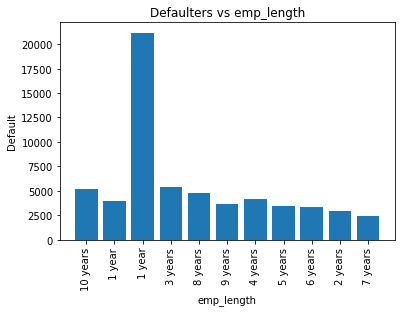

In [27]:
objects=dataset['emp_length'].unique()
print(objects)
import numpy as np
y_pos = np.arange(len(objects))

new_df=dataset.groupby("emp_length").sum()
#print(new_df)
total_attacks=new_df["Default"]
plt.bar(y_pos, total_attacks, alpha=1.0)
#plt.barh(y_pos, total_attacks)
plt.xticks(y_pos, objects,rotation=90)
plt.xlabel("emp_length")
plt.ylabel('Default')
plt.title('Defaulters vs emp_length')
plt.show()

[' 36 months' ' 60 months']


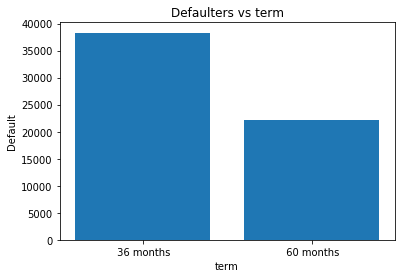

In [28]:
objects=dataset['term'].unique()
print(objects)
import numpy as np
y_pos = np.arange(len(objects))

new_df=dataset.groupby("term").sum()
#print(new_df)
total_attacks=new_df["Default"]
plt.bar(y_pos, total_attacks, alpha=1.0)
#plt.barh(y_pos, total_attacks)
plt.xticks(y_pos, objects,rotation=360)
plt.xlabel("term")
plt.ylabel('Default')
plt.title('Defaulters vs term')
plt.show()

In [29]:
dataset['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [30]:
dataset['home_ownership'].value_counts()

MORTGAGE    438081
RENT        351652
OWN          86245
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']


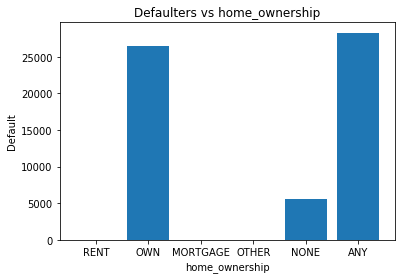

In [31]:
objects=dataset['home_ownership'].unique()
print(objects)
import numpy as np
y_pos = np.arange(len(objects))

new_df=dataset.groupby("home_ownership").sum()
#print(new_df)
total_attacks=new_df["Default"]
plt.bar(y_pos, total_attacks, alpha=1.0)
#plt.barh(y_pos, total_attacks)
plt.xticks(y_pos, objects,rotation=360)
plt.xlabel("home_ownership")
plt.ylabel('Default')
plt.title('Defaulters vs home_ownership')
plt.show()

In [32]:
dataset.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                         int64
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
mths_since_last_delinq        float64
open_acc                      float64
pub_rec                       float64
revol_bal   

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


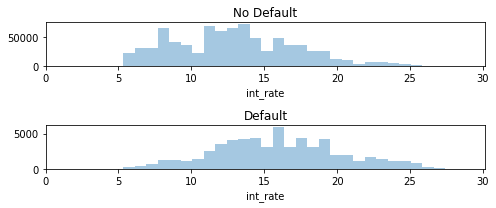

In [33]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 3))

sns.distplot(dataset[dataset['Default'] == 0]['int_rate'], bins=30, ax=ax1, kde=False)
sns.distplot(dataset[dataset['Default'] == 1]['int_rate'], bins=30, ax=ax2, kde=False)

ax1.set_title('No Default')
ax2.set_title('Default')

ax1.set_xbound(lower=0)
ax2.set_xbound(lower=0)

plt.tight_layout()
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


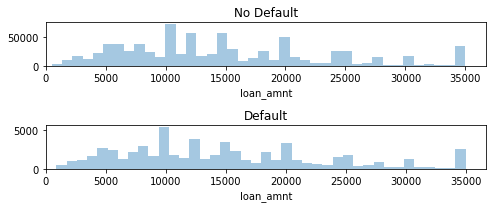

In [39]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 3))

sns.distplot(dataset[dataset['Default'] == 0]['loan_amnt'], bins=40, ax=ax1, kde=False)
sns.distplot(dataset[dataset['Default'] == 1]['loan_amnt'], bins=40, ax=ax2, kde=False)

ax1.set_title('No Default')
ax2.set_title('Default')

ax1.set_xbound(lower=0)
ax2.set_xbound(lower=0)

plt.tight_layout()
plt.show()

In [40]:
colname = ['term', 'grade','sub_grade', 'home_ownership','emp_length','emp_title', 'verification_status','loan_status','pymnt_plan',
           'purpose','addr_state','earliest_cr_line','title','initial_list_status']
colname

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'emp_length',
 'emp_title',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'title',
 'initial_list_status']

In [41]:
from sklearn import preprocessing
le={}
#iterate through columns and assigning it with labels 
for x in colname:
    le[x]=preprocessing.LabelEncoder()
# iterate through colname and comparing it with the labels assigned to them in le and repalcing it with label value    
for x in colname:
        dataset[x]=le[x].fit_transform(dataset[x])

In [42]:
dataset.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                            int64
int_rate                      float64
installment                   float64
grade                           int64
sub_grade                       int64
emp_title                       int64
emp_length                      int64
home_ownership                  int64
annual_inc                    float64
verification_status             int64
issue_d                         int64
loan_status                     int64
pymnt_plan                      int64
purpose                         int64
title                           int64
addr_state                      int64
dti                           float64
delinq_2yrs                   float64
earliest_cr_line                int64
inq_last_6mths                float64
mths_since_last_delinq        float64
open_acc                      float64
pub_rec                       float64
revol_bal   

In [43]:
loan_correlation = dataset.corr()
loan_correlation

loan_amnt  funded_amnt  funded_amnt_inv      term  \
loan_amnt                    1.000000     0.999281         0.997656  0.411793   
funded_amnt                  0.999281     1.000000         0.998521  0.410836   
funded_amnt_inv              0.997656     0.998521         1.000000  0.411194   
term                         0.411793     0.410836         0.411194  1.000000   
int_rate                     0.145469     0.145634         0.145921  0.428559   
installment                  0.944886     0.945898         0.944190  0.144766   
grade                        0.153122     0.152976         0.152221  0.445460   
sub_grade                    0.158971     0.158745         0.157959  0.454762   
emp_title                   -0.041759    -0.041605        -0.041206 -0.017424   
emp_length                   0.000567     0.000569         0.000905  0.005508   
home_ownership              -0.196431    -0.196273        -0.196263 -0.110813   
annual_inc                   0.332869     0.332665         0.332034  0.058656   
verification_status          0.282376     0.281825         0.282279  0.169150   
issue_d                      0.097987     0.102735         0.115146  0.078033   
loan_status                 -0.062960    -0.064079        -0.066139 -0.091709   
pymnt_plan                   0.002970     0.002977         0.002920  0.001468   
purpose                     -0.156023    -0.156936        -0.158815 -0.053827   
title                       -0.131362    -0.132468        -0.134855 -0.059606   
addr_state                   0.015725     0.015859         0.015995  0.024821   
dti                          0.019947     0.020338         0.021237  0.050515   
delinq_2yrs                  0.000092     0.000404         0.000874 -0.000236   
earliest_cr_line            -0.012304    -0.012233        -0.012114 -0.001150   
inq_last_6mths              -0.028078    -0.028413        -0.029554 -0.000745   
mths_since_last_delinq      -0.027445    -0.027490        -0.026595 -0.006079   
open_acc                     0.198315     0.198809         0.199421  0.086006   
pub_rec                     -0.081933    -0.081599        -0.080764 -0.025542   
revol_bal                    0.336918     0.336830         0.336299  0.093277   
revol_util                   0.119311     0.119816         0.120589  0.085437   
total_acc                    0.222314     0.222270         0.222484  0.101954   
initial_list_status          0.084307     0.085845         0.089232  0.132403   
out_prncp                    0.644625     0.646520         0.648792  0.394863   
out_prncp_inv                0.644627     0.646523         0.648803  0.394819   
total_pymnt                  0.479927     0.478617         0.474980  0.083898   
total_pymnt_inv              0.480653     0.479506         0.478918  0.084975   
total_rec_prncp              0.394480     0.393274         0.389656 -0.026062   
total_rec_int                0.539102     0.538087         0.536141  0.385747   
total_rec_late_fee           0.033361     0.033058         0.030928  0.006155   
recoveries                   0.074280     0.073843         0.072514  0.058105   
collection_recovery_fee      0.054249     0.054011         0.052214  0.037238   
last_pymnt_d                 0.095491     0.099226         0.112471  0.085154   
last_pymnt_amnt              0.230686     0.230214         0.229105  0.071581   
last_credit_pull_d           0.070103     0.073199         0.084113  0.060965   
collections_12_mths_ex_med  -0.016681    -0.016528        -0.016200 -0.005427   
acc_now_delinq               0.003888     0.003989         0.004168  0.004974   
tot_coll_amt                -0.004101    -0.004104        -0.004098 -0.002236   
tot_cur_bal                  0.316531     0.316744         0.316408  0.106745   
total_rev_hi_lim             0.300059     0.300260         0.299952  0.062383   
Default                      0.001260     0.000561        -0.001378  0.038714   

                            int_rate  installment     grad

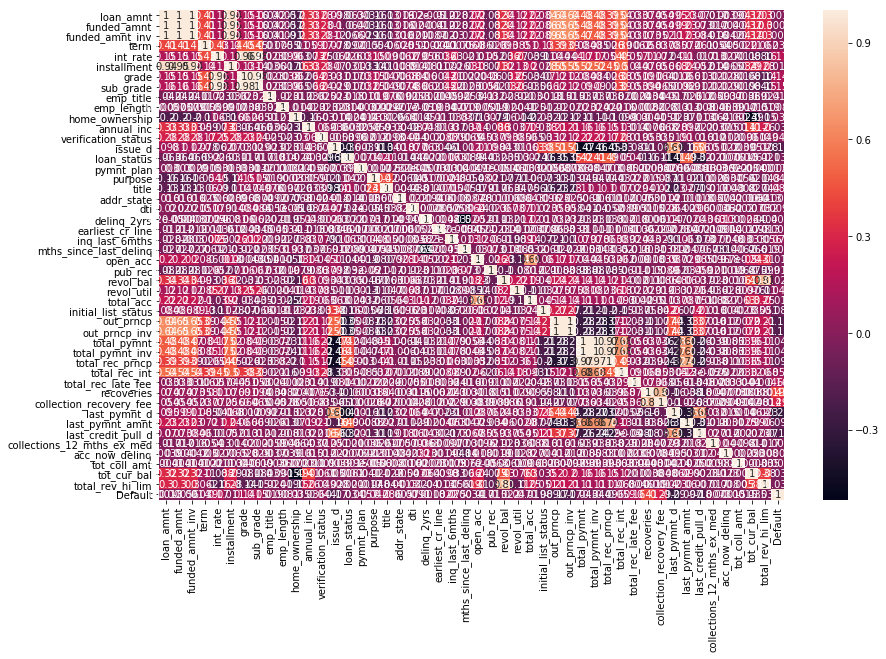

In [44]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

In [46]:
vars_to_be_removed=['loan_amnt','funded_amnt','funded_amnt_inv','verification_status','sub_grade','loan_status','total_pymnt','total_pymnt_inv','installment','issue_d','out_prncp_inv','out_prncp',
                    'total_rec_prncp','revol_bal','total_rec_int']
dataset.drop(vars_to_be_removed,axis=1,inplace=True)

In [48]:
# create X and Y
Y=dataset.values[:,-1]
# it will store in the form of array and we pass -1 to subset an aaray , here  only last column
X=dataset.values[:,:-1]
# all rowsand and columns except last column

In [49]:
Y=Y.astype(int)
print(Y)

[0 1 0 ... 0 0 0]


In [50]:
# splitting the data into train and set => train_test_split()
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [51]:
#building,training and testing the model

from sklearn.linear_model import LogisticRegression
classifier=(LogisticRegression())
#fitting the data to model
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")

print(classification_report(Y_test, Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model:",acc)

[[244770      0]
 [ 11453   6628]]
Classification report:
             precision    recall  f1-score   support

          0       0.96      1.00      0.98    244770
          1       1.00      0.37      0.54     18081

avg / total       0.96      0.96      0.95    262851

Accuracy of the model: 0.9564277860841313


In [53]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier()
model_DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
#fit the model on the data and predict the values
Y_pred = model_DecisionTree.predict(X_test)
#print(Y_pred)
print(list(zip(Y_test,Y_pred)))

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0),

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[237261   7509]
 [  6708  11373]]
0.9459123229510255
             precision    recall  f1-score   support

          0       0.97      0.97      0.97    244770
          1       0.60      0.63      0.62     18081

avg / total       0.95      0.95      0.95    262851

